In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split #For splitting
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#To ignore unnecessary warnings
import warnings

In [3]:
train_df = pd.read_csv(r"C:\Users\Atehe Stephen\Downloads\Compressed\ai-bootcamp-2021\Train.csv")
test_df = pd.read_csv(r"C:\Users\Atehe Stephen\Downloads\Compressed\ai-bootcamp-2021\Test.csv")

In [4]:
train_df['Marital_Status'].unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [5]:
print(f'The shape of the train set is {train_df.shape}')
print(f'The shape of the train set is {test_df.shape}')

The shape of the train set is (1568, 27)
The shape of the train set is (672, 26)


In [6]:
sub_file = pd.DataFrame(columns=['ID', 'Response'])
sub_file.ID = test_df.ID
sub_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [7]:
train_df.isna().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [8]:
test_df.isna().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [9]:
train_df['Disposable_Income'].fillna(train_df['Disposable_Income'].mean(),inplace=True)
test_df['Disposable_Income'].fillna(test_df['Disposable_Income'].mean(),inplace=True)
train_df.isna().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [10]:
test_df.isna().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1568 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [12]:
train_df.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,31924.924495,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41801.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,61391.400000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81055.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
train_df.describe(include=['O']).T

,count,unique,top,freq
ID,1568,1568,ID_H5TPIMZZ,1
Education_Level,1568,5,Graduation,802
Marital_Status,1568,8,Married,615
Date_Customer,1568,619,12-05-2014,10


In [14]:
train_df.drop('ID', axis=1, inplace=True)
test_df.drop('ID', axis=1, inplace=True)

In [15]:
for col in train_df.columns:
    if len(train_df[col].unique()) < 10:
        print(f'{col.upper()} COUNT')
        print(train_df[col].value_counts())
        print('-'*30, '\n')


EDUCATION_LEVEL COUNT
Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64
------------------------------ 

MARITAL_STATUS COUNT
Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64
------------------------------ 

NO_OF_KIDS_IN_HOME COUNT
0    880
1    654
2     34
Name: No_of_Kids_in_home, dtype: int64
------------------------------ 

NO_OF_TEEN_IN_HOME COUNT
0    824
1    708
2     36
Name: No_of_Teen_in_home, dtype: int64
------------------------------ 

CMP3ACCEPTED COUNT
0    1454
1     114
Name: Cmp3Accepted, dtype: int64
------------------------------ 

CMP4ACCEPTED COUNT
0    1454
1     114
Name: Cmp4Accepted, dtype: int64
------------------------------ 

CMP5ACCEPTED COUNT
0    1442
1     126
Name: Cmp5Accepted, dtype: int64
------------------------------ 

CMP1ACCEPTED COUNT
0    1467
1     101


In [16]:
train_df.dtypes

Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
dtype: object

In [17]:
test_df.dtypes

Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
dtype: object

In [18]:
train_df['Date_Customer'] = pd.to_datetime(train_df['Date_Customer'])
test_df['Date_Customer'] = pd.to_datetime(test_df['Date_Customer'])

In [19]:
train_df.columns

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [20]:
categ_cols = train_df.select_dtypes(include=['object', 'category']).columns
num_col = [col for col in train_df.columns if col not in categ_cols ]

## VISUALIZATIONS


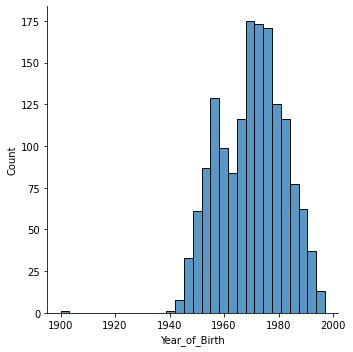

In [21]:
sns.displot(x=train_df['Year_of_Birth'],  data = train_df)

In [22]:
train_df=train_df[train_df['Year_of_Birth'] > 1940]

<AxesSubplot:xlabel='Response', ylabel='count'>

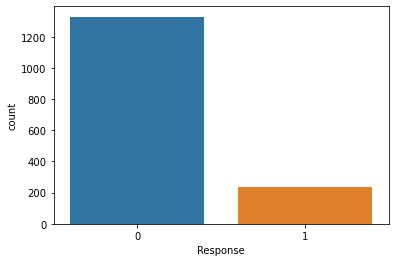

In [23]:
sns.countplot(x='Response', data=train_df)

In [24]:
train_df['Response'].unique()

array([0, 1], dtype=int64)

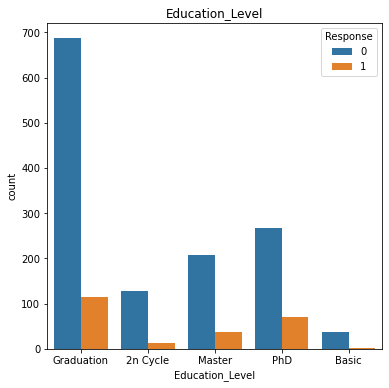

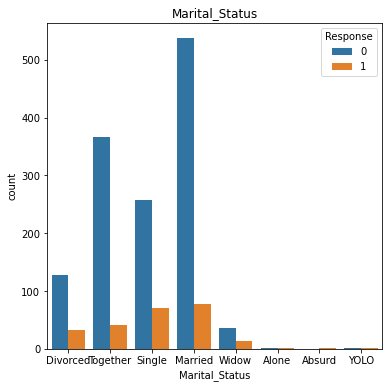

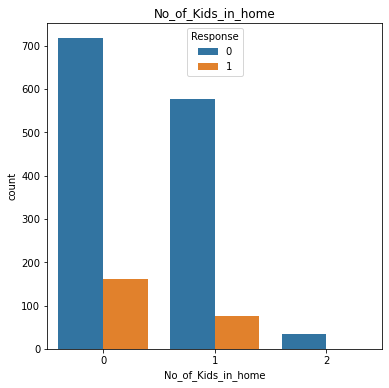

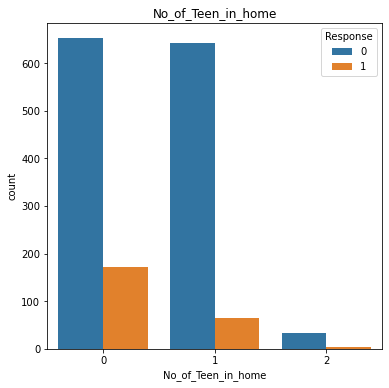

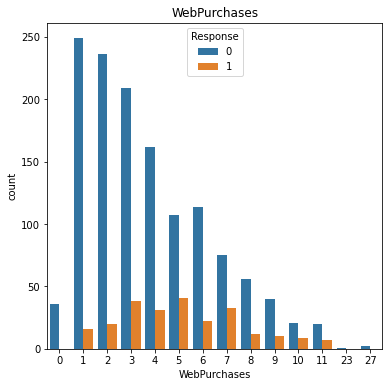

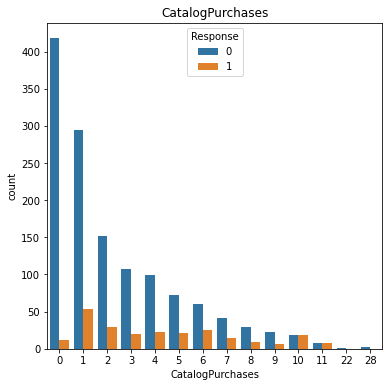

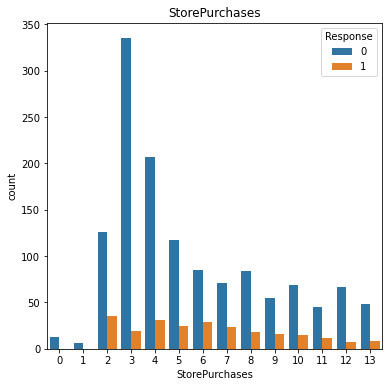

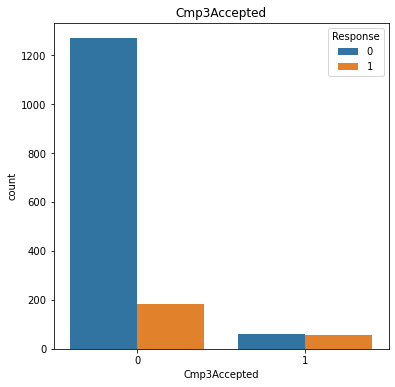

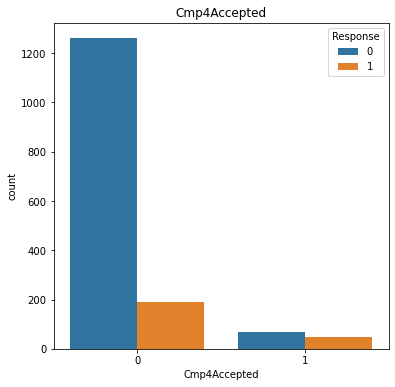

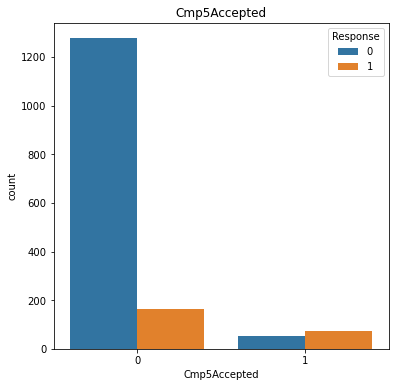

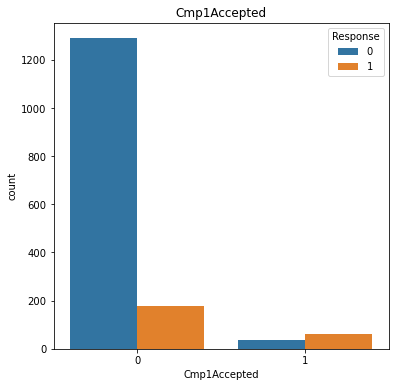

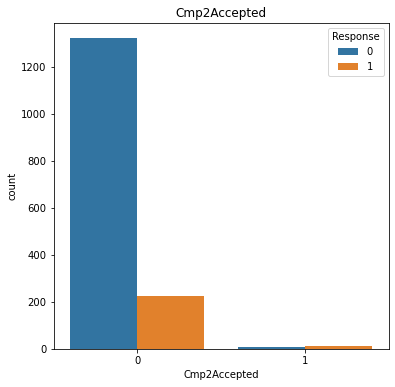

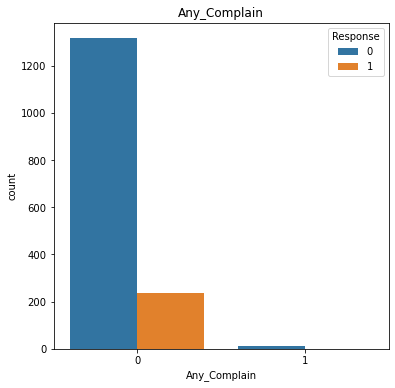

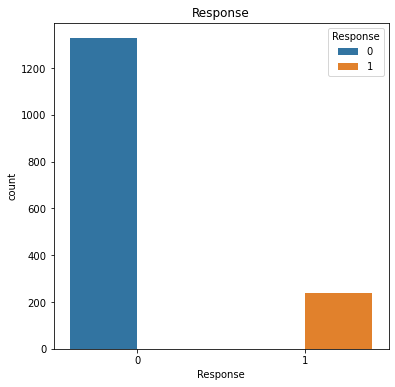

In [25]:
def plot_count(data, cols, legend=None):
    for col in cols:
        if len(data[col].unique()) < 15:
            fig = plt.figure(figsize=(6,6))
            ax = fig.gca()
            sns.countplot(x=col, hue=legend, data=data)
            ax.set_title(col)
            plt.show()

plot_count(train_df, train_df.columns, 'Response')

<AxesSubplot:xlabel='Education_Level,Marital_Status'>

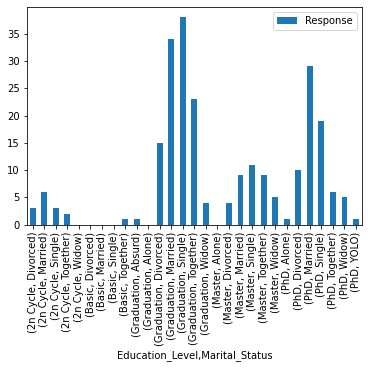

In [26]:
train_df[['Education_Level','Marital_Status','Response']].groupby(['Education_Level','Marital_Status']).sum().plot.bar()

<AxesSubplot:xlabel='No_of_Kids_in_home,No_of_Teen_in_home'>

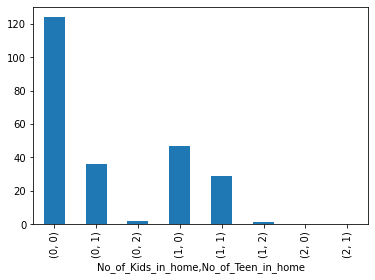

In [27]:
train_df[['No_of_Teen_in_home','No_of_Kids_in_home', 'Response']].groupby(['No_of_Kids_in_home','No_of_Teen_in_home'])['Response'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Disposable_Income'>

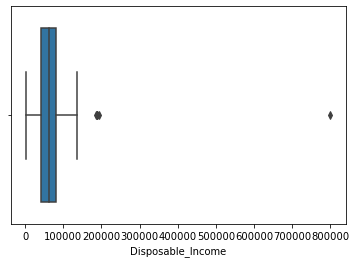

In [28]:
sns.boxplot(x=train_df['Disposable_Income'])

In [29]:
# train_df = train_df[train_df['Disposable_Income']<150000]

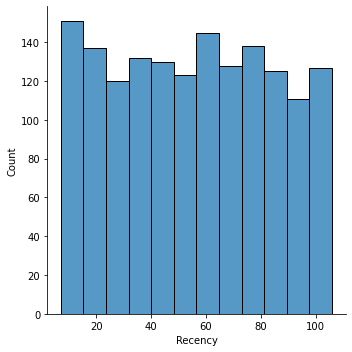

In [30]:
sns.displot(data=train_df, x="Recency")

<AxesSubplot:ylabel='Frequency'>

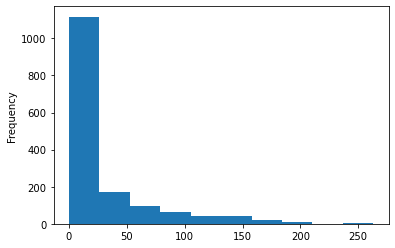

In [31]:
train_df['Amount_on_SweetProducts'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

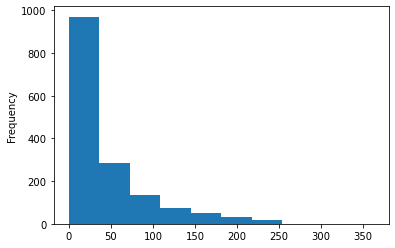

In [32]:
train_df['Amount_on_GoldProds'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

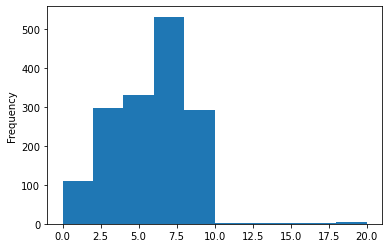

In [33]:
train_df['WebVisitsMonth'].plot.hist()

<AxesSubplot:xlabel='WebVisitsMonth'>

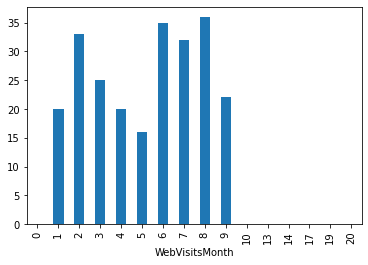

In [34]:
train_df.groupby('WebVisitsMonth')['Response'].sum().plot.bar()

In [35]:
x.columns

NameError: name 'x' is not defined

In [ ]:
train_df['CatalogPurchases'].plot.hist()

In [ ]:
train_df['StorePurchases'].plot.hist()

In [ ]:
train_df['Amount_on_Wines'].plot.hist()

In [ ]:
train_df['WebVisitsMonth'].plot.hist()

In [ ]:
train_df['Amount_on_Fruits'].plot.hist()

In [ ]:
sns.displot(train_df['Discounted_Purchases'], kind='kde')

In [ ]:
cols = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth']
for col in cols:
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()
    sns.histplot(train_df[col])
    ax.set_title(col)
    plt.show()

In [ ]:
for col in cols:
    

## FEATURE ENGINEERING

In [ ]:
dataset =(train_df, test_df)

In [ ]:
for data in dataset:
    data.loc[:,'Year_of_Birth'] = 2019 - data.loc[:,'Year_of_Birth']
    data.rename(columns={'Year_of_Birth':'Age'},inplace=True)

train_df.head()

In [ ]:
# LABEL ENCODING OF EDUCATION_LEVEL
for data in dataset:
    data['Education_Level'].replace({'Graduation':1, '2n Cycle':2, 'Master':3, 'PhD':4, 'Basic':0}, inplace=True)  

train_df.head()

In [ ]:
train_df['Date_Customer'] = train_df['Date_Customer'].dt.to_period('M') - pd.to_datetime('2021-10-01').to_period('M')
test_df['Date_Customer'] = test_df['Date_Customer'].dt.to_period('M') - pd.to_datetime('2021-10-01').to_period('M')

In [ ]:
from operator import attrgetter
 
train_df['Date_Customer'] = 0-train_df['Date_Customer'].apply(attrgetter('n'))
test_df['Date_Customer'] = 0-test_df['Date_Customer'].apply(attrgetter('n'))



In [ ]:
# ONNE HOT ENCODING MARITAL_STATUS
m_stat_train =  pd.get_dummies(train_df['Marital_Status'])
m_stat_test =  pd.get_dummies(test_df['Marital_Status'])

test_df = test_df.join(m_stat_test)
train_df = train_df.join(m_stat_train)

train_df.drop(columns=['Marital_Status'], inplace=True)
test_df.drop(columns=['Marital_Status'], inplace=True)

In [ ]:
# enc = OneHotEncoder(handle_unknown='ignore')
# m_status_train = pd.DataFrame(enc.fit_transform(train_df[['Marital_Status']]).toarray())
# m_status_test = pd.DataFrame(enc.fit_transform(test_df[['Marital_Status']]).toarray())

In [ ]:
y = train_df['Response']

In [ ]:
x= train_df.drop('Response', axis=1)
sub = test_df

In [ ]:
sub = sub.reindex(x.columns, axis=1)
sub.replace({np.nan:0}, inplace=True)

In [ ]:
x.head()

In [ ]:
x.columns

In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_trans = FunctionTransformer(np.log, validate=True)

data_new = log_trans.transform(train_df[cols])




In [ ]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

sc = RobustScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.transform(x_test)

sub_scale = sc.transform(sub)

In [ ]:
# x_test_scale = np.nan_to_num(x_test_scale)

In [ ]:
smote = SMOTE(random_state=1)
x_smote, y_train_smote = smote.fit_resample(x_train_scale, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=1)
log_reg.fit(x_smote, y_train_smote)

y_log = log_reg.predict(x_test_scale)

In [ ]:
import lightgbm as lgb #install this library using pip install lgbm if you don't have it 
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

#Creating model 
cat_model=CatBoostClassifier(random_seed=1)

#Training Catboost Model on train set
cat_model.fit(x_smote,y_train_smote)

#Predictiing on Test Set
y_pred_cat=cat_model.predict(x_test_scale)

#Evaluating model using f1_score
print("Catboost F1 score on validation set is : ",f1_score(y_test,y_pred_cat))


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_log)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(x_smote, y_train_smote)

y_rfc= rfc.predict(x_test)
f1_score(y_rfc, y_test)

In [ ]:
import xgboost as xgb
xgb=xgb.XGBClassifier(max_depth=3, n_estimators=500, n_jobs=-1, scale_pos_weight=4)
xgb.fit(x_smote, y_train_smote)
y_xgb= xgb.predict(x_test_scale)
f1_score(y_xgb, y_test)

## SAVE TO CSV

In [36]:
sub_file.to_csv(r"C:\Users\Atehe Stephen\Documents\New folder\submiss3.csv", index=False)

In [ ]:
submi_file['Response'] = log_reg.predict(sub)